In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.optimizers import Adam

from mlxtend.plotting import plot_decision_regions

In [2]:
X, y = make_moons(100, noise=0.25, random_state=2)

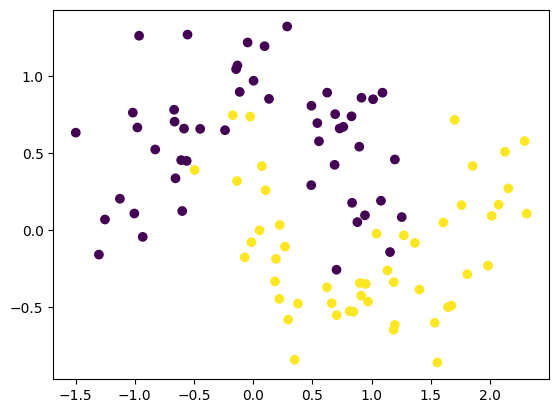

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [4]:
model1 = Sequential([
    Dense(128, input_dim=2, activation="relu"),
    Dense(128, activation="relu"),
    Dense(1, activation="sigmoid")
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])

history1 = model1.fit(X, y, epochs=2000, validation_split=0.2, verbose=False)

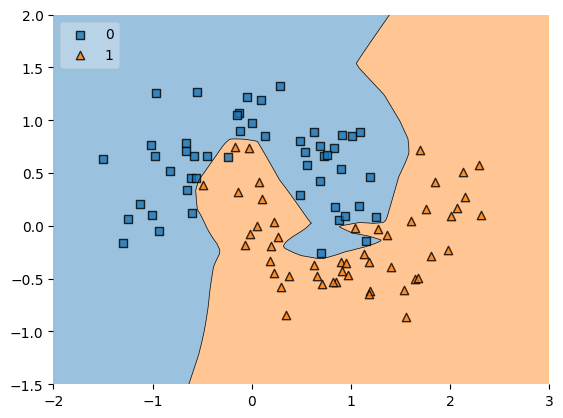

In [6]:
plot_decision_regions(X, y.astype("int"), clf=model1, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

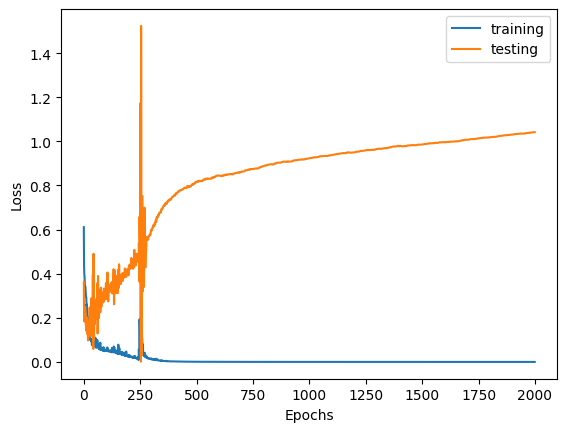

In [7]:
plt.plot(history1.history["loss"], label="training")
plt.plot(history1.history["val_loss"], label="testing")
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend()
plt.show()

In [8]:
model2 = Sequential([
    Dense(128, input_dim=2, activation="relu", kernel_regularizer=l2(0.03)),
    Dense(128, activation="relu", kernel_regularizer=l2(0.03)),
    Dense(1, activation="sigmoid")
])

adam = Adam(learning_rate=0.01)
model2.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])

history2 = model2.fit(X, y, epochs=2000, validation_split=0.2, verbose=False)

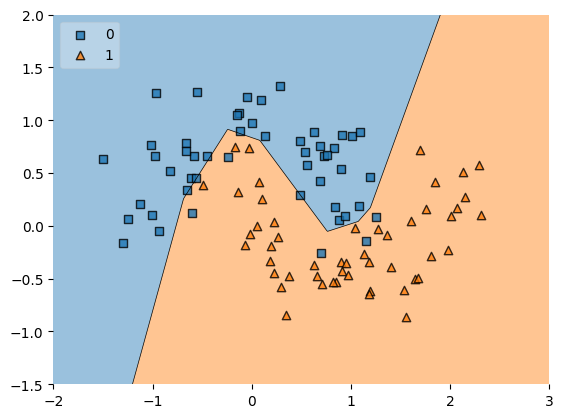

In [9]:
plot_decision_regions(X, y.astype("int"), clf=model2, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

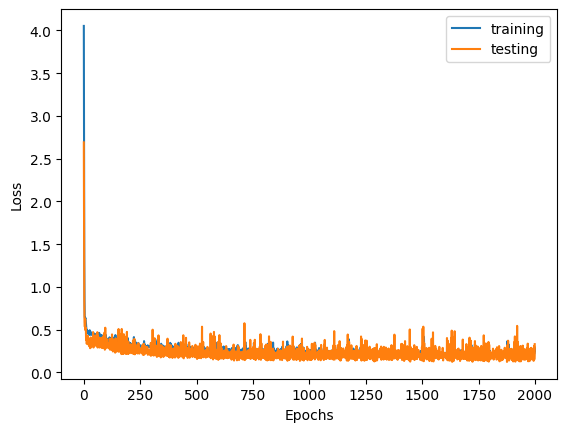

In [10]:
plt.plot(history2.history["loss"], label="training")
plt.plot(history2.history["val_loss"], label="testing")
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend()
plt.show()

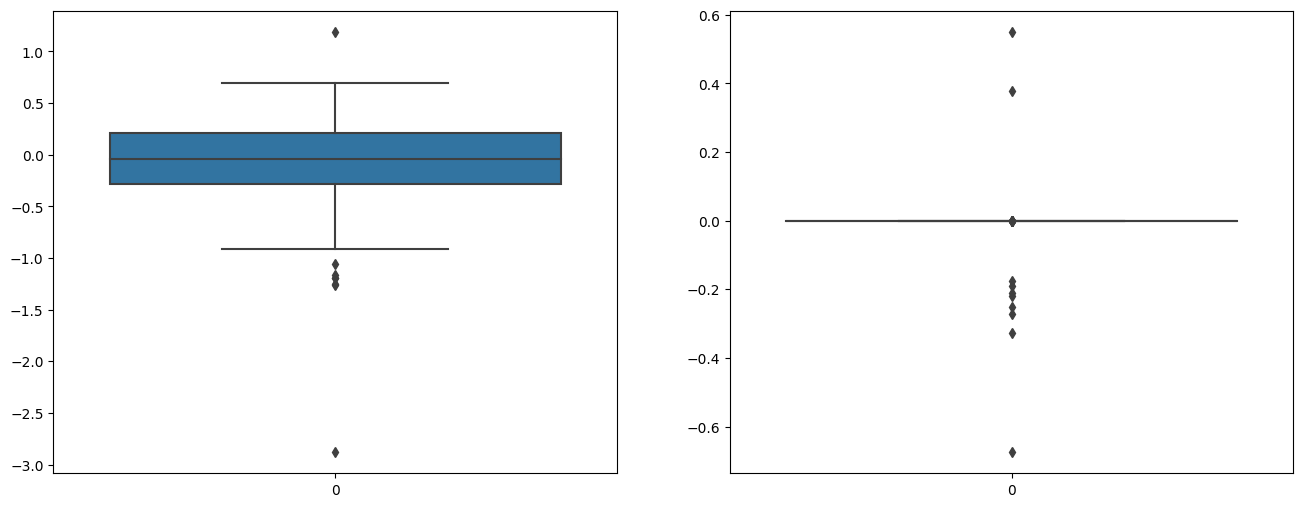

In [11]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(model1_weight_layer1, ax=axs[0])
sns.boxplot(model2_weight_layer1, ax=axs[1])
plt.show()

In [12]:
print(model1_weight_layer1.max(), model2_weight_layer1.max())
print(model1_weight_layer1.min(), model2_weight_layer1.min())

1.1853827 0.5492323
-2.8800964 -0.6749561


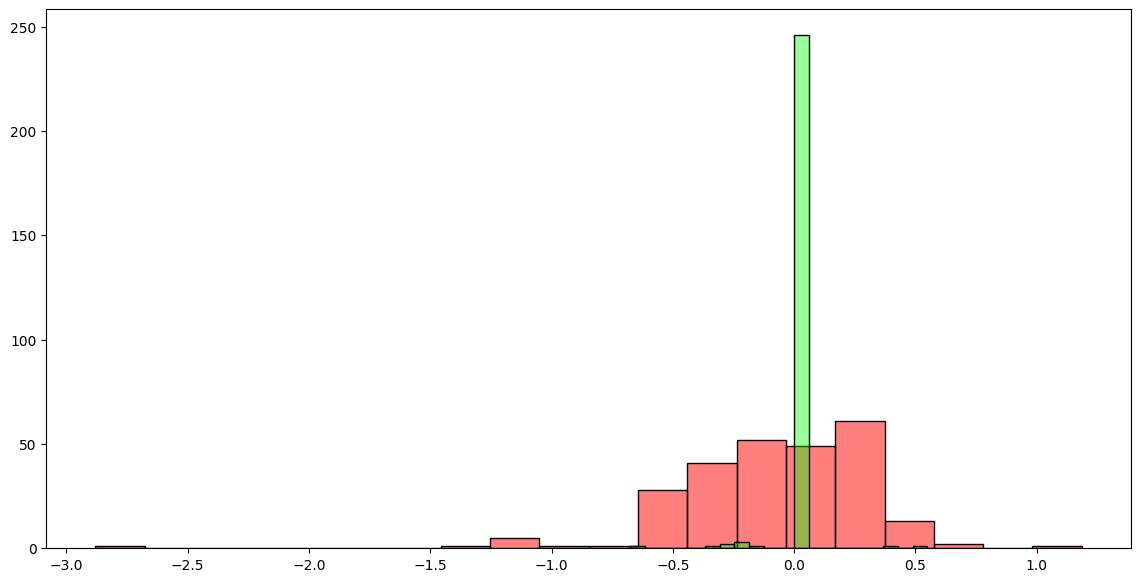

In [27]:
plt.subplots(figsize = (14, 7))
plt.hist(model1_weight_layer1, color=(1, 0, 0, 0.5), edgecolor = 'black', bins=20)
plt.hist(model2_weight_layer1, color=(0, 1, 0, 0.4), edgecolor = 'black', bins=20)
plt.show()